In [53]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [54]:
repo_root = os.environ['HOME'] + '/DESI/'

sys.path.append(repo_root)

In [55]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate

In [56]:
# update pytest

field  = 'G9'
dryrun = False
realz  = 0
version = 'v1' # 'GAMA4'

In [57]:
fpath = os.environ['HOME'] + '/data/{}/randoms/randoms_{}_{}.fits'.format(version, field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913)])

In [58]:
fpath = os.environ['HOME'] + '/data/{}/randoms/randoms_N8_{}_{}.fits'.format(version, field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7766460011003555)])

In [59]:
fpath = os.environ['HOME'] + '/data/{}/randoms/randoms_bd_{}_{}.fits'.format(version, field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7766460011003555)])

In [60]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,IS_BOUNDARY,RAND_N8,FILLFACTOR,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,bytes4,float32,float32,float32,float64,float64,float64,int64,int32,float64,float64,int64
129.91917,0.9630972,0.17833136,836733.75,1033339,G9,-331.0364,395.646,8.672172,513.9013945444735,-45.647413200102214,4.211200499007996,0,2121,0.9889676786071583,7.254431862020988,1862828
134.6177,-0.5850006,0.24175805,2001640.9,277242,G9,-484.6323,491.143,-7.0451984,689.8905166713065,-4.552118400989399,-13.034564401493304,0,2191,1.0,16.51122748603918,179421
138.14908,0.5982364,0.2318685,1777287.4,2015130,G9,-493.99463,442.47278,6.924683,662.2148867291021,36.481019130586894,1.1761021336778024,0,2130,1.0,27.23674006160685,1882340
129.85628,1.6507276,0.21484718,1429525.0,167734,G9,-395.11298,473.28323,17.767584,614.1840860017346,-55.22875291473468,12.436378044268508,0,2116,0.9866363073704606,7.962683501090891,1145194
137.84189,0.65900105,0.18979728,1001433.6,620978,G9,-406.0459,367.6393,6.300375,547.1101041134528,27.19850999004637,1.5510219653376476,0,2155,1.0,21.965019684610855,2299144
136.4454,-1.2915285,0.0738935,63461.688,127288,G9,-158.23444,150.44571,-4.9225125,218.21845483571659,5.5238006534409285,-6.817103322452513,0,1522,0.7096694044507755,2.7167478710942414,1850872
133.5719,2.983789,0.20031433,1169448.5,1147770,G9,-397.06546,417.36942,30.027184,576.1324600367345,-14.313954429858823,25.026774726701294,1,1112,0.5184969630415653,0.0,0
135.72247,-0.6331526,0.1450767,459970.44,1443865,G9,-302.58542,295.04907,-4.670449,422.5345342724051,5.360635778716527,-8.33874561467107,0,2147,1.0,9.855697324566338,1805739
131.47552,1.0984006,0.14652121,473423.06,1362489,G9,-282.57245,319.66513,8.180246,425.90320453050913,-26.19660904421195,4.483189535852952,0,2184,1.0,13.941318741591584,998460


In [61]:
fpath = os.environ['HOME'] + '/data/{}/randoms/randoms_bd_ddp_n8_{}_{}.fits'.format(version, field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 180.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7766460011003555),
             ('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Ext

Text(0, 0.5, 'DEC [deg.]')

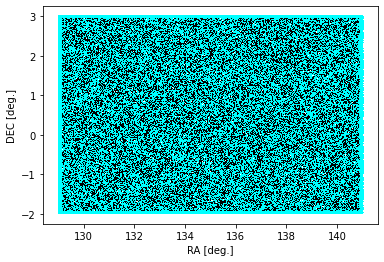

In [62]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

Text(0.5, 0, 'V')

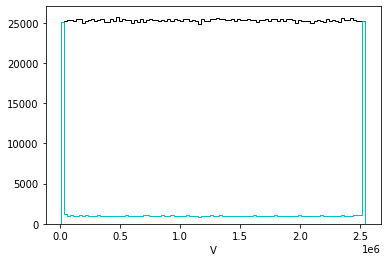

In [63]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

pl.xlabel('V')

(0.0, 0.6)

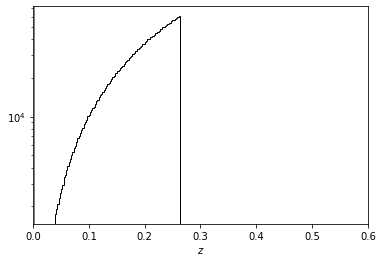

In [64]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')

pl.axvline(300. / 2.9979e5, lw=0.5, c='k')

pl.yscale('log')
pl.xlabel('$z$')

pl.xlim(0.0, 0.6)

In [65]:
pos = np.c_[rand['CARTESIAN_X'], rand['CARTESIAN_Y'], rand['CARTESIAN_Z']]
pos = rotate(rand['RANDOM_RA'], rand['RANDOM_DEC'], pos)

Text(0, 0.5, '$y$')

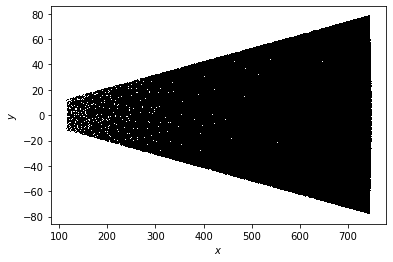

In [66]:
pl.plot(pos[::10,0], pos[::10,1], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

Text(0, 0.5, '$y$')

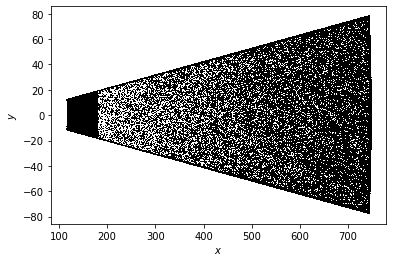

In [67]:
pl.plot(pos[:,0][rand['IS_BOUNDARY'].astype(bool)], pos[:,1][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')

pl.xlabel('$x$')
pl.ylabel('$y$')

(0.0, 1000.0)

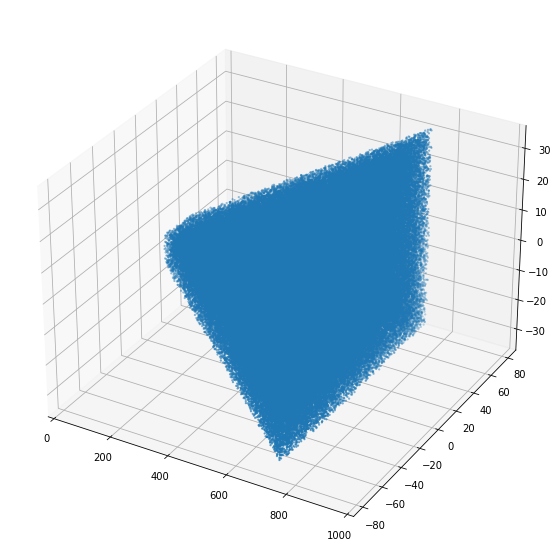

In [68]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

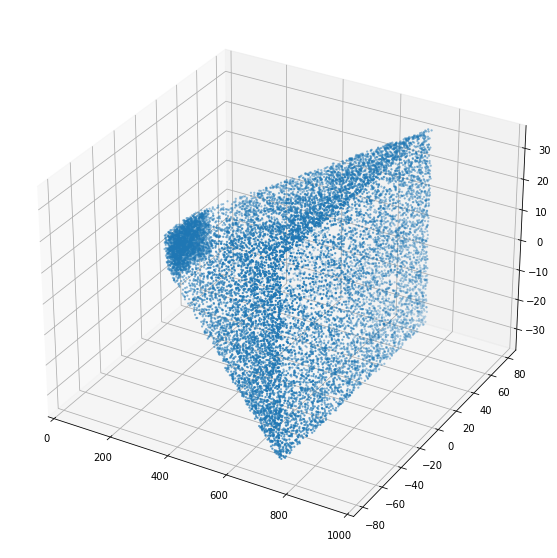

In [69]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[:,0][rand['IS_BOUNDARY'].astype(bool)][::10],\
           pos[:,1][rand['IS_BOUNDARY'].astype(bool)][::10],\
           pos[:,2][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [70]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000359412601321

In [71]:
np.mean(rand['IS_BOUNDARY'].data)

0.05877027965855013

In [72]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'IS_BOUNDARY',
 'RAND_N8',
 'FILLFACTOR',
 'BOUND_DIST',
 'BOUND_ID',
 'DDP1_N8',
 'DDP2_N8',
 'DDP3_N8',
 'IN_DDP1',
 'IN_DDP2',
 'IN_DDP3',
 'DDP1_DELTA8',
 'DDP2_DELTA8',
 'DDP3_DELTA8',
 'DDP1_DELTA8_TIER')

In [73]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(290, 2341)

(50.0, 2500.0)

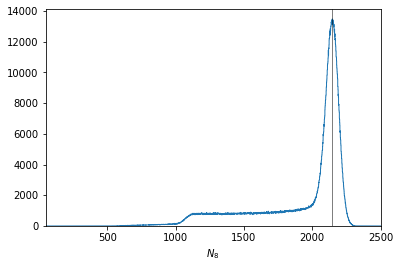

In [74]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 3500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 2500.)

In [75]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

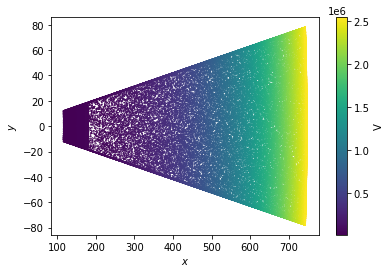

In [76]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='V')

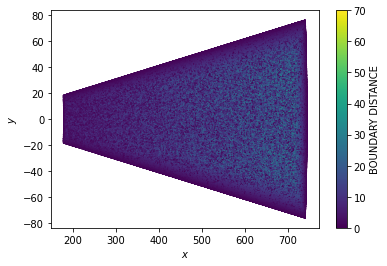

In [77]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

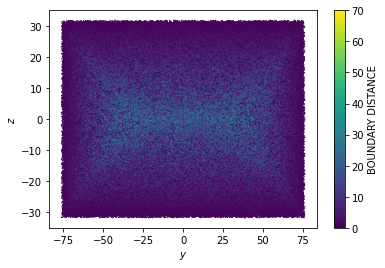

In [78]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,1][isin], pos[:,2][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

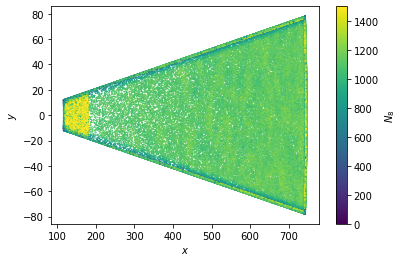

In [79]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['RAND_N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label=r'$N_8$')

In [80]:
d = np.arange(0., 16., 0.1)
r = np.ones_like(d) * 8 # Mpc/h
sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]

(0.2, 1.2)

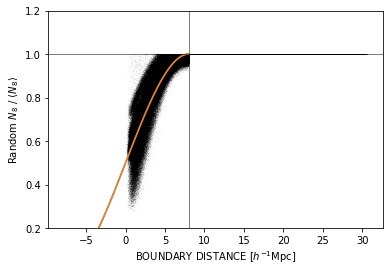

In [148]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['FILLFACTOR'][isin], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.plot(8. - d, sphere_cap_vol)
pl.plot(8. - d, theory_ff(d, 8))


pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 \ / \ \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

In [175]:
print(var, exp)

4289.321169701264 3954.314028981676


In [167]:
# rand_density. TODO: source from somewhere else.
n_bar = 2.
radius = 8.

# number of gals expected == Nrand = var
var = n_bar * (4./3.) * np.pi * radius**3

# actual gals
exp = np.mean(rand['FILLFACTOR'][isin] * var)

sig_ff = np.sqrt(var / exp**2)
s2n = np.sqrt(var)

In [168]:
def theory_ff(bound_dist, radius):
    d = bound_dist
    r = radius
    sphere_cap_vol = 1. - (3. * 8. - d) * d**2 / 4. / 8**3. # [V sphere]
    
    return sphere_cap_vol

(-0.5, 0.5)

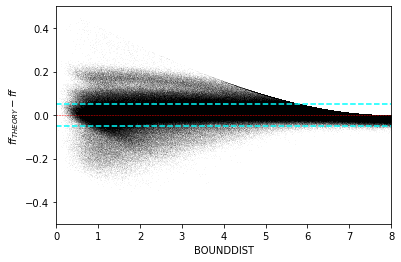

In [173]:
rand['FF_THEORY'] = theory_ff(8 - rand['BOUND_DIST'], 8)

pl.scatter(rand['BOUND_DIST'][isin], rand['FILLFACTOR'][isin] - rand['FF_THEORY'][isin], marker='.', lw=0.0, s=1, alpha=0.1, c='k')
pl.axhline(0, ls='--', lw=0.5, color='r')
pl.axhline(3* -sig_ff, ls='--', color='cyan')
pl.axhline(3*sig_ff, ls='--', color='cyan')
pl.xlabel(r'BOUNDDIST')
pl.ylabel(r'$ff_{THEORY} - ff$')
pl.xlim(0, 8)
pl.ylim(-0.5, 0.5)

###### fitsfile: D, Exp sigma, sigma, S2N





# opath = '/cosma/home/durham/dc-moor2/data/GAMA4/s2n.fits'
# dat.write(opath, format='fits', overwrite=True)


Text(0.5, 0, 'BOUND_DIST [$h^{-1}$Mpc]')

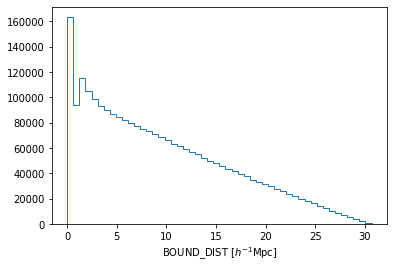

In [83]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [$h^{-1}$Mpc]')

In [87]:
gold = Table.read(os.environ['HOME'] + '/data/{}/gama_gold_ddp_n8.fits'.format(version))
gold.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

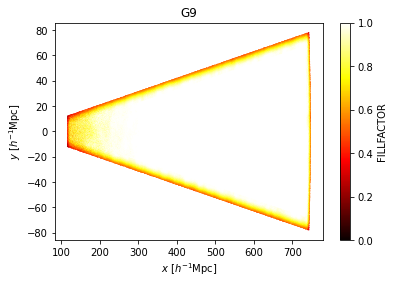

In [88]:
ddp_zmin  = gold.meta['DDP1_ZMIN']
ddp_zmax  = gold.meta['DDP1_ZMAX']

isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

fills     = rand['FILLFACTOR'].data[isin]
pos_slice = pos[isin]

fills     = fills[np.abs(pos_slice[:,2]) < 5.]
pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
plt.scatter(pos_slice[:,0],\
            pos_slice[:,1],\
            c=fills,\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('$x$ [$h^{-1}$Mpc]')
pl.ylabel('$y$ [$h^{-1}$Mpc]')

pl.colorbar(label='FILLFACTOR')
    
plt.title('{}'.format(field))
plt.show()

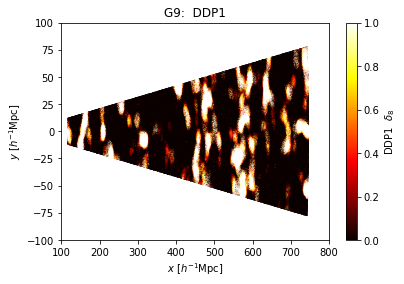

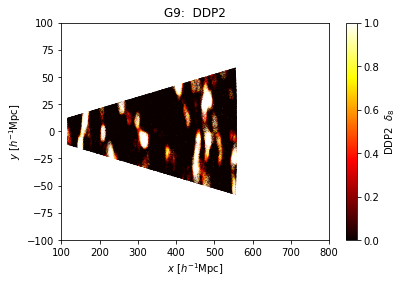

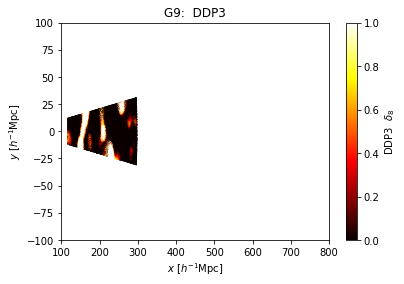

In [89]:
for idx in np.arange(1, 4, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)

    fills     = rand['DDP{}_DELTA8'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=0.,\
                vmax=1.,\
                cmap='hot')
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [90]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [ ]:
# np.unique(rand['DDP{}_DELTA8_TIER'.format(idx)])

In [ ]:
#plt.scatter(rand['CARTESIAN_X'], rand['CARTESIAN_Y'], s='DDP1_'

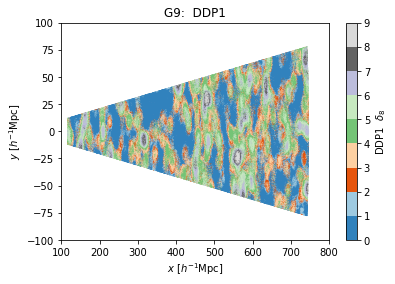

In [91]:
for idx in np.arange(1, 2, 1):
    ddp_zmin  = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax  = gold.meta['DDP{}_ZMAX'.format(idx)]

    isin      = (rand['Z'] > ddp_zmin) & (rand['Z'] < ddp_zmax)
    isin      = rand['DDP{}_DELTA8_TIER'.format(idx)] > -999
    
    fills     = rand['DDP{}_DELTA8_TIER'.format(idx)].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
    
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(100.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP{}  $\delta_8$'.format(idx))
    
    plt.title('{}:  DDP{}'.format(field, idx))

Text(0, 0.5, 'DDP2 $\\delta_8$')

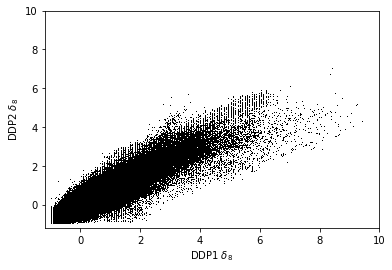

In [92]:
# Larger minimum redshift & Smaller maximum redshift. 
isin = (rand['Z'] > gold.meta['DDP1_ZMIN']) & (rand['Z'] < gold.meta['DDP2_ZMAX'])

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlim(-1.2, 10.)
pl.ylim(-1.2, 10.)

pl.xlabel('DDP1 $\delta_8$')
pl.ylabel('DDP2 $\delta_8$')

In [93]:
rand_ddp1fill = np.clip(np.sort(rand[rand['IN_DDP1']]['FILLFACTOR'].data)[::-1], 0, 1) 
rand_ddp2fill = np.clip(np.sort(rand[rand['IN_DDP2']]['FILLFACTOR'].data)[::-1], 0, 1)
rand_ddp3fill = np.clip(np.sort(rand[rand['IN_DDP3']]['FILLFACTOR'].data)[::-1], 0, 1)

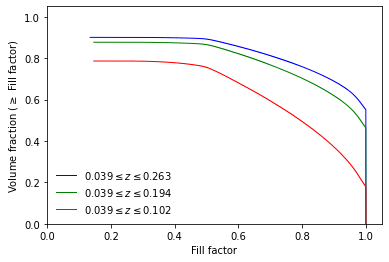

In [94]:
plt.plot(rand_ddp1fill, np.cumsum(rand_ddp1fill) / len(rand_ddp1fill), lw=1, color='blue',  label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(rand_ddp2fill, np.cumsum(rand_ddp2fill) / len(rand_ddp2fill), lw=1, color='green', label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(rand_ddp3fill, np.cumsum(rand_ddp3fill) / len(rand_ddp3fill), lw=1, color='red',   label=r'${:.3f} \leq z \leq {:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))

plt.xlabel('Fill factor')
plt.ylabel(r'Volume fraction ($\geq$ Fill factor)')

pl.xlim(0.0, 1.05)
pl.ylim(0.0, 1.05)

plt.legend(frameon=False, loc=3)

# Done.